# M16 - Pilares da Criação

Ferramenta para baixar as imagens
https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

In [3]:
M16 = fits.open('novo/hst_13926_09_wfc3_uvis_f657n_ick909_drc.fits')

In [4]:
M16

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024AE4C7A490>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000024AE492CCA0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000024AE4CF2EB0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000024AE4D1F0D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024AE4D1F1F0>]

In [5]:
M16.info()

Filename: novo/hst_13926_09_wfc3_uvis_f657n_ick909_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     863   ()      
  1  SCI           1 ImageHDU        94   (6157, 6257)   float32   
  2  WHT           1 ImageHDU        45   (6157, 6257)   float32   
  3  CTX           1 ImageHDU        40   (6157, 6257)   int32   
  4  HDRTAB        1 BinTableHDU    564   4R x 277C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 9A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 46A, 3A, K, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, 

In [6]:
M16[0]

In [7]:
M16[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    4 / Number of standard extensions                  
FILENAME= 'hst_13926_09_wfc3_uvis_f657n_ick909_drc.fits' / name of file         
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

In [8]:
M16[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6157                                                  
NAXIS2  =                 6257                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'ick909c3q                         ' / rootname of the observation set
EXPNAME = 'ick909c3q                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     

In [9]:
data = M16[1].data

In [10]:
type(data)

numpy.ndarray

Our data is now stored as a 2D numpy array. 

In [11]:
data.shape

(6257, 6157)

In [12]:
data.dtype.name

'float32'

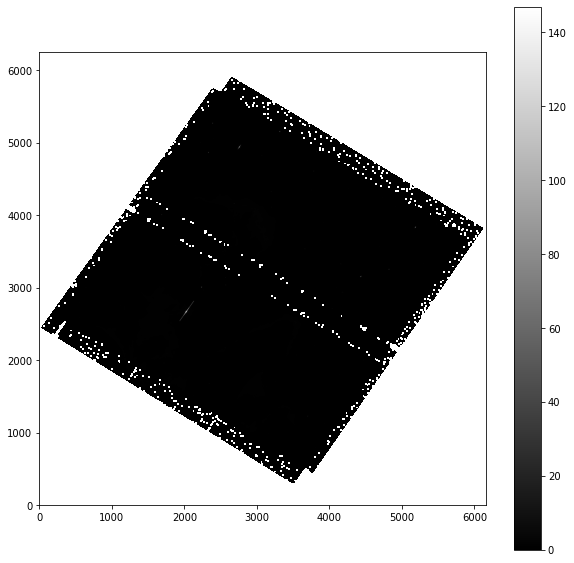

In [13]:
plt.figure(figsize=(10,10))

plt.imshow(data, cmap='gray', origin='lower')
plt.colorbar()

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

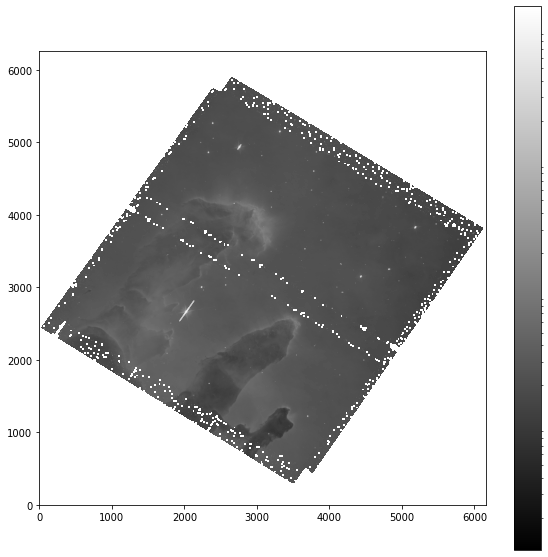

In [14]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(10,10))
plt.imshow(data, cmap='gray', norm=LogNorm(), origin='lower')
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])


In [15]:
M42_R = fits.open('novo/hst_13926_09_wfc3_uvis_f673n_ick909_drc.fits') #filtro 673
M42_G = fits.open('novo/hst_13926_09_wfc3_uvis_f657n_ick909_drc.fits') #filtro 657
M42_B = fits.open('novo/hst_13926_09_wfc3_uvis_f502n_ick909_drc.fits') #filtro 502

In [16]:
from astropy.visualization import make_lupton_rgb

In [17]:
r = M42_R[1].data
g = M42_G[1].data
b = M42_B[1].data

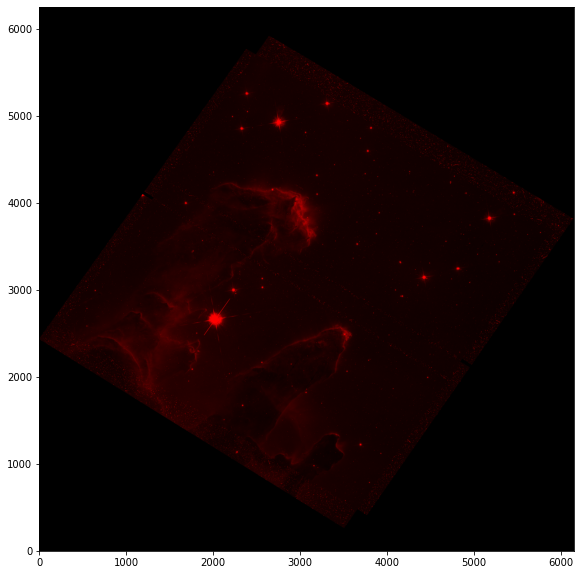

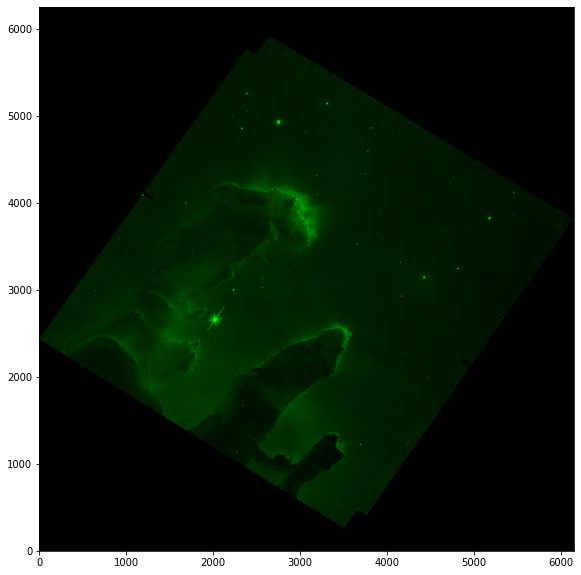

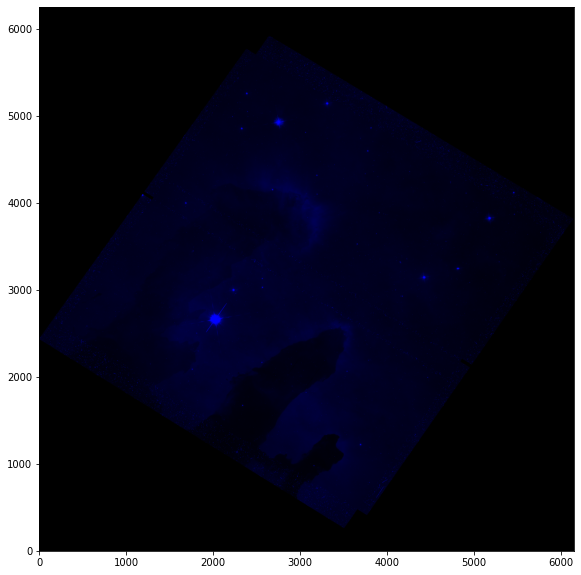

In [18]:
plt.figure(figsize=(10,10))
rgb_default = make_lupton_rgb(r*6,g*0,b*0,stretch=1.5,Q=5)
plt.imshow(rgb_default, origin='lower')

plt.figure(figsize=(10,10))
rgb_default = make_lupton_rgb(r*0,g*0.75,b*0,stretch=1.5,Q=5)
plt.imshow(rgb_default, origin='lower')

plt.figure(figsize=(10,10))
rgb_default = make_lupton_rgb(r*0,g*0,b*5,stretch=1.5,Q=5)
plt.imshow(rgb_default, origin='lower')

In [19]:
forc=np.float_()

r = fits.open('novo/hst_13926_09_wfc3_uvis_f673n_ick909_drc.fits')[1].data #filtro 673
g = fits.open('novo/hst_13926_09_wfc3_uvis_f657n_ick909_drc.fits')[1].data #filtro 657
b = fits.open('novo/hst_13926_09_wfc3_uvis_f502n_ick909_drc.fits')[1].data #filtro 502

r = np.array(r,forc)
g = np.array(g,forc)
b = np.array(b,forc)

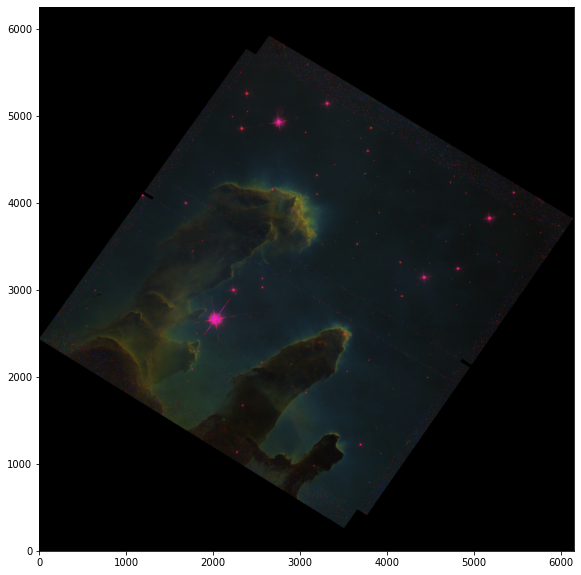

In [20]:
plt.figure(figsize=(10,10))
rgb_default = make_lupton_rgb(r*6,g*0.75,b*5,stretch=1.5,Q=5)
plt.imshow(rgb_default, origin='lower')
plt.show()

In [21]:
#plt.figure(figsize=(10,10))
#rgb_default = make_lupton_rgb(r*10,g*1,b*10,stretch=1.5,Q=5)
#plt.imshow(rgb_default, origin='lower')
#plt.show()

In [22]:
from PIL import Image 

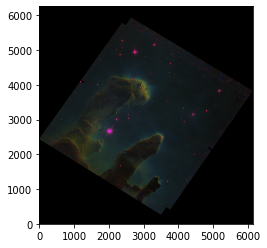

In [23]:
#Original_Image = plt.imshow(rgb_default, origin='lower')
#Original_Image
plt.imshow(rgb_default, origin='lower')

In [24]:
plt.imsave("pilares_novo.png",rgb_default, origin='lower')

In [25]:
Original_Image = Image.open("pilares_novo.png") 
Original_Image.show()

In [26]:
rotated_image1 = Original_Image.rotate(32)
rotated_image1.show()

In [27]:
'''
X, Y, Z = 1,1,1
max = 10

while X <= max:
    while Y <= 10:
        while Z <= max:
            print('X: ',X,'| Y: ', Y,' | Z:',Z)
            plt.figure(figsize=(10,10))
            rgb_default = make_lupton_rgb(r*X,g*Y,b*Z,stretch=1.5,Q=5)
            plt.imshow(rgb_default, origin='lower')
            plt.show()
            Z += 1
        Y += 1            
        Z = 1
    X += 1
    Y = 1
'''    

"\nX, Y, Z = 1,1,1\nmax = 10\n\nwhile X <= max:\n    while Y <= 10:\n        while Z <= max:\n            print('X: ',X,'| Y: ', Y,' | Z:',Z)\n            plt.figure(figsize=(10,10))\n            rgb_default = make_lupton_rgb(r*X,g*Y,b*Z,stretch=1.5,Q=5)\n            plt.imshow(rgb_default, origin='lower')\n            plt.show()\n            Z += 1\n        Y += 1            \n        Z = 1\n    X += 1\n    Y = 1\n"